# Introduction

This data visualization project focuses on crime statistics sourced from South Australia Police (SAPOL), covering offenses against persons and properties reported between 2023 and 2024. SAPOL, a key provider of policing and community services, collected the data as part of their broader initiatives in law enforcement and community engagement.

The Australian government oversaw the data collection, conducted in 2023 and 2024 during quarters 1 and 2. The dataset aims to evaluate suburb-based crime statistics to assess security levels and inform strategies for risk reduction.

The dataset includes two main components:

`data_sa_crime_q1_q2_2023-24`: Contains attributes such as Reported Date, Suburb-Incident, Postcode-Incident, Offense Level descriptions, and Offense Count with approximately 50,123 records with 16,875 records

`au_postcodes`: Provides postcode-related details for contextual analysis.

 This project adheres to downloading and using the dataset under this [license](https://creativecommons.org/licenses/by/4.0).





# Data Cleaning

### Importing Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib

In [3]:
df=pd.read_csv(r'data/data_sa_crime_q1_q2_2023-24.csv')
df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,2/7/2023,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1
1,3/7/2023,MURRAY BRIDGE,5253,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1
2,4/7/2023,GLENUNGA,5064,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1
3,5/7/2023,CAMPBELLTOWN,5074,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1
4,5/7/2023,MILE END,5031,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1


### Checking the types

In [4]:
print(df.dtypes)

Reported Date                  object
Suburb - Incident              object
Postcode - Incident            object
Offence Level 1 Description    object
Offence Level 2 Description    object
Offence Level 3 Description    object
Offence count                   int64
dtype: object


In [5]:
print(df.shape[0])

50123


#### Interpretation

The data is shaped to have 50123 crime cases and the activity reported were the report date, suburb, postcode, offence level 1, 2,3 and the count 

### Checking Null Values and Categories

In [6]:
null_col=df.isnull().sum()
print(null_col)


Reported Date                    0
Suburb - Incident              125
Postcode - Incident            132
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence count                    0
dtype: int64


In [7]:
print ('Categories of Offence Level 1')
print(df['Offence Level 1 Description'].unique())
print()
print('Categories of Offence Level 2')
print(df['Offence Level 2 Description'].unique())
print()
print('Categories of Offence Level 3')
print(df['Offence Level 3 Description'].unique())

Categories of Offence Level 1
['OFFENCES AGAINST THE PERSON' 'OFFENCES AGAINST PROPERTY']

Categories of Offence Level 2
['OTHER OFFENCES AGAINST THE PERSON' 'ROBBERY AND RELATED OFFENCES'
 'SEXUAL ASSAULT AND RELATED OFFENCES' 'ACTS INTENDED TO CAUSE INJURY'
 'PROPERTY DAMAGE AND ENVIRONMENTAL' 'HOMICIDE AND RELATED OFFENCES'
 'FRAUD DECEPTION AND RELATED OFFENCES' 'THEFT AND RELATED OFFENCES'
 'SERIOUS CRIMINAL TRESPASS']

Categories of Offence Level 3
['Abduction, harassment and other offences' 'Aggravated robbery'
 'Aggravated sexual assault' 'Assault police' 'Blackmail and extortion'
 'Common Assault' 'Dangerous or negligent acts' 'Graffiti' 'Murder'
 'Non-aggravated robbery' 'Non-aggravated sexual assault'
 'Non-assaultive sexual offences' 'Obtain benefit by deception'
 'Other acts intended to cause injury'
 'Other fraud, deception and related offences'
 'Other homicide and related offences'
 'Other property damage and environmental' 'Other theft'
 'Other unlawful entry with inte

In [8]:
print(f"Offence count minimum {df['Offence count'].min()}\n"
      f"Offence count maximum {df['Offence count'].max()}\n"
      f"Offence count mean {round(df['Offence count'].mean(), 3)}\n"
      f"Offence count standard deviation {round(df['Offence count'].std(),3)}")

Offence count minimum 1
Offence count maximum 22
Offence count mean 1.239
Offence count standard deviation 0.744


#### Interpretation

Null Values seems to be allocated only in Suburb-Incident and Postcode-incident.

The Offence Levels can be categorized after catogirizing 

As for the offence count, it shows that there aren't normally scaled showing a good sign of security measures taken

However, there are more postcode non listed than suburb then it can be identified 

In [8]:
# printing the rows with null values
null_cols=df.isnull().any(axis=1)
# allocate them in the original dataframe
rows_nulls=df[null_cols]
rows_nulls_df=pd.DataFrame(rows_nulls)
# Taking only the columns needed
rows_nulls_df=rows_nulls_df[["Suburb - Incident", "Postcode - Incident"]]
rows_nulls_df.head(10)




,Suburb - Incident,Postcode - Incident
18,NaN,NaN
142,NaN,5000
254,NaN,NaN
262,NaN,NaN
341,NUNDROO,NaN
422,NaN,NaN
909,NaN,NaN
919,NaN,NaN
940,NaN,5000
946,NaN,5000


In [9]:
condition1= (rows_nulls_df['Suburb - Incident'].isnull()) & (rows_nulls_df['Postcode - Incident'].isnull())
both_null=rows_nulls_df[condition1]
print(both_null.shape[0])

99


##### Check Conditions

In [10]:
condition2=(rows_nulls_df['Suburb - Incident'].isnull()) & (rows_nulls_df['Postcode - Incident'].notnull())
suburb_null=rows_nulls_df[condition2]
print(suburb_null)

      Suburb - Incident Postcode - Incident
142                 NaN                5000
940                 NaN                5000
946                 NaN                5000
1026                NaN                5000
4120                NaN                5000
4521                NaN                5000
4529                NaN                5000
4541                NaN                5000
4629                NaN                5000
4642                NaN                5000
4829                NaN                5000
5086                NaN                5000
5146                NaN                5000
5258                NaN                5000
5674                NaN                5000
5786                NaN                5000
6048                NaN                5000
6150                NaN                5000
6193                NaN                5000
6601                NaN                5000
8036                NaN                5000
12260               NaN         

In [11]:
condition3=(rows_nulls_df['Suburb - Incident'].notnull()) & (rows_nulls_df['Postcode - Incident'].isnull())
postcode_null=rows_nulls_df[condition3]
print(postcode_null)

      Suburb - Incident Postcode - Incident
341             NUNDROO                 NaN
4479           KINGSLEY                 NaN
4483       DARLINGHURST                 NaN
4511            BURWOOD                 NaN
4524         LEICHHARDT                 NaN
4569          RIVERWOOD                 NaN
4601             NUNDAH                 NaN
4685        SAINT MARYS                 NaN
4760      CAMPBELLFIELD                 NaN
4898         WHITTLESEA                 NaN
4970            WODONGA                 NaN
5085         WEST PERTH                 NaN
5126          MELBOURNE                 NaN
5581           NEW PORT                 NaN
5725        PASCOE VALE                 NaN
5925          MELBOURNE                 NaN
6061          CAVERSHAM                 NaN
6195            CLAYTON                 NaN
6637          MELBOURNE                 NaN
11995            NEWMAN                 NaN
15817        HELENSVALE                 NaN
16282          PORT VIC         

#### Interpretation 

In Police Cases, some location can be undisclosed and in our case marked as "NOT DISCLOSED". For the condition of both nulls we can us it

A post code of 5000 is pointing for adelaide and 5540  is port piri

As for the condition3 where the suburb is shown and the postcode is NAN some cases show that some weren't filled even if the post code is known. Maybe an idea of contactenating the data with another dataset for Australian post codes

https://github.com/Elkfox/Australian-Postcode-Data/blob/master/au_postcodes.csv



#### First Changing both null to "NOT DISCLOSED"

In [12]:
condition1_original= (df['Suburb - Incident'].isnull()) & (df['Postcode - Incident'].isnull())
df.loc[condition1_original, ['Suburb - Incident', 'Postcode - Incident']] = 'NOT DISCLOSED'
print (df.isnull().sum())


Reported Date                   0
Suburb - Incident              26
Postcode - Incident            33
Offence Level 1 Description     0
Offence Level 2 Description     0
Offence Level 3 Description     0
Offence count                   0
dtype: int64


#### Changing Condition 1

In [13]:
#Values
postcode1="5000"
postcode2="5540"

df.loc[(df['Suburb - Incident'].isnull())&(df['Postcode - Incident']==postcode1),'Suburb - Incident']='ADELAIDE'
df.loc[(df['Suburb - Incident'].isnull())&(df['Postcode - Incident']==postcode2),'Suburb - Incident']='PORT PIRI'
print (df.isnull().sum())

Reported Date                   0
Suburb - Incident               0
Postcode - Incident            33
Offence Level 1 Description     0
Offence Level 2 Description     0
Offence Level 3 Description     0
Offence count                   0
dtype: int64


#### Careful Considerations

After checking the website https://www.parcelforce.com/sites/default/files/au-postcodes-all-areas.pdf

few postocode can be found, SINCE IT IS IN THE SOUTH MELLBOURNE WAS TAKEN SOUTH

As well there should be fixing to some names 

"GREENARCES" -> "GREENACRES"

"GIBERTON" -> "BRIGHTON"

"HIGHERCOMBE"->"SEACOMBE"

"NUNDROO" -> "NUNDAH"

In [14]:
postcode_dictionary={
    "BURWOOD": "2130",
    "QUIRINDI": "2514",
    "WODONGA": "3690",
    "SAINT MARYS": "5461",
    "CAMPBELLFIELD": "3061",
    "WHITTLESEA": "3757",
    "WEST PERTH": "6005",
    "MELBOURNE": "5006",
    "CAVERSHAM": "6055",
    "CLAYTON": "5256",
    "NEWMAN": "6753",
    "NEW PORT": "3015",
    "PASCOE VALE": "3044",
    "HELENSVALE": "4212",
    "PORT VIC": "5573",
    "WILLIAMSTOWN": "5357",
    "PHILLIP": "2606",
    "HALLET COVE": "5158",
    "GREENACRES": "5086",
    "SEACOMBE": "5047",
    "BRIGHTON": "5048",
    "DARLINGHURST": "2010",
    "NUNDAH": "4012",
    "RIVERWOOD": "2210",
    "KINGSLEY": "6026",
    "LEICHHARDT": "4305",
    
}



#### Name Changing in PDF and updating postcodes

In [15]:
df.loc[df['Suburb - Incident']=="GREENARCES", 'Suburb - Incident'] = 'GREENACRES'
df.loc[df['Suburb - Incident']=="GIBERTON", 'Suburb - Incident'] = 'BRIGHTON'
df.loc[df['Suburb - Incident']=="HIGHERCOMBE", 'Suburb - Incident'] = 'SEACOMBE'
df.loc[df['Suburb - Incident']=="NUNDROO", 'Suburb - Incident'] = 'NUNDAH'


In [16]:
#looping through the dictionary
for suburb, postcode in postcode_dictionary.items():
    df.loc[(df['Suburb - Incident']==suburb)&(df['Postcode - Incident'].isnull()), 'Postcode - Incident']=postcode


In [17]:
print (df.isnull().sum())

Reported Date                  0
Suburb - Incident              0
Postcode - Incident            0
Offence Level 1 Description    0
Offence Level 2 Description    0
Offence Level 3 Description    0
Offence count                  0
dtype: int64


In [18]:
value_not='NOT DISCLOSED'
non_disclosed_count=((df['Postcode - Incident']==value_not)&(df['Suburb - Incident']==value_not)).sum()
print(non_disclosed_count)

531


#### Importing the dataset for postcodes and concatenating to get longitude and latitude

There are 531 cases where the post code and suburb is undisclosed

In [19]:
au_postcodes=pd.read_csv(r'data/au_postcodes.csv')
print(au_postcodes.dtypes)

post_codes_copy=au_postcodes.copy()
print('The shape of the dataset is', au_postcodes.shape[0])

postcode        int64
place_name     object
state_name     object
state_code     object
latitude      float64
longitude     float64
accuracy      float64
dtype: object
The shape of the dataset is 16875


In [20]:
au_postcodes['postcode']=au_postcodes['postcode'].astype(str)
#dropping duplicates is a must
au_postcodes = au_postcodes.drop_duplicates(subset=['postcode'], keep='first')
merged_df=pd.merge(df,au_postcodes,left_on='Postcode - Incident',right_on='postcode',how='left')
final_df=merged_df[['Reported Date', 'Suburb - Incident', 'Postcode - Incident',
       'Offence Level 1 Description', 'Offence Level 2 Description', 'Offence Level 3 Description', 'Offence count','latitude','longitude']]

final_df.head(4)

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,latitude,longitude
0,2/7/2023,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.9287,138.5986
1,3/7/2023,MURRAY BRIDGE,5253,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-35.2300,139.2221
2,4/7/2023,GLENUNGA,5064,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.9629,138.6566
3,5/7/2023,CAMPBELLTOWN,5074,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.8821,138.6825


In [21]:
final_df.shape[0]

50123

In [22]:
print(final_df.isnull().sum())
#about 20 cases which didn't found longitude and latitude

Reported Date                    0
Suburb - Incident                0
Postcode - Incident              0
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence count                    0
latitude                       552
longitude                      552
dtype: int64


In [23]:
print(final_df['Postcode - Incident'].loc[(final_df['Postcode - Incident']!='NOT DISCLOSED')&(final_df['latitude'].isnull())])

3121     5611
9646     5713
10949    5719
11926    5611
13473    5713
13526    5713
15947    5719
16304    5719
16536    5713
18036    2514
19400    5719
19617    5719
20823    5719
25369    5719
25870    2514
26989    5719
29126    5719
39748    5719
39754    5713
39835    5719
49921    5611
Name: Postcode - Incident, dtype: object


In [24]:
final_df.head(20)

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,latitude,longitude
0,2/7/2023,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.9287,138.5986
1,3/7/2023,MURRAY BRIDGE,5253,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-35.2300,139.2221
2,4/7/2023,GLENUNGA,5064,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.9629,138.6566
3,5/7/2023,CAMPBELLTOWN,5074,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.8821,138.6825
4,5/7/2023,MILE END,5031,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.9441,138.5648
5,5/7/2023,MOORAK,5291,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-37.6667,140.5833
6,6/7/2023,GLENELG NORTH,5045,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",2,-34.9833,138.5167
7,7/7/2023,INGLE FARM,5098,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.8333,138.6333
8,7/7/2023,PARAFIELD GARDENS,5107,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.7825,138.6108
9,8/7/2023,RENMARK,5341,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1,-34.1006,140.6737


#### Few Data Changes


The Offence Level 1 Description marks whether it is an offence against a property or an offence against a person, so better to change the values to just "property" and "person"


In [25]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
#Categories of Offence Level 1 ['OFFENCES AGAINST THE PERSON' 'OFFENCES AGAINST PROPERTY']
final_df = final_df.replace({'Offence Level 1 Description':{
        'OFFENCES AGAINST THE PERSON': 'person',
        'OFFENCES AGAINST PROPERTY': 'property'
    }
})

# Data Visulization

## Pie Chart over property or person

In [26]:
offence_counts=final_df['Offence Level 1 Description'].value_counts()
fig0=px.pie(values=offence_counts, names=offence_counts.index,title='Distributions of Offences')
fig0.show()

In [27]:
unique_offence_2_prop=final_df[final_df['Offence Level 1 Description']=='property']['Offence Level 2 Description'].unique()
unique_offence_2_person=final_df[final_df['Offence Level 1 Description']=='person']['Offence Level 2 Description'].unique()
print('Offence Level 2 for person: ')
print(unique_offence_2_person)
print()
print('Offence Level 2 for property:')
print(unique_offence_2_prop)
print() 

unique_offence_3_prop=final_df[final_df['Offence Level 1 Description']=='property']['Offence Level 3 Description'].unique()
unique_offence_3_person=final_df[final_df['Offence Level 1 Description']=='person']['Offence Level 3 Description'].unique()
print('Offence Level 3 for person: ')
print(unique_offence_3_person)
print()
print('Offence Level 3 for property:')
print(unique_offence_3_prop)

Offence Level 2 for person: 
['OTHER OFFENCES AGAINST THE PERSON' 'ROBBERY AND RELATED OFFENCES'
 'SEXUAL ASSAULT AND RELATED OFFENCES' 'ACTS INTENDED TO CAUSE INJURY'
 'HOMICIDE AND RELATED OFFENCES']

Offence Level 2 for property:
['PROPERTY DAMAGE AND ENVIRONMENTAL'
 'FRAUD DECEPTION AND RELATED OFFENCES' 'THEFT AND RELATED OFFENCES'
 'SERIOUS CRIMINAL TRESPASS']

Offence Level 3 for person: 
['Abduction, harassment and other offences' 'Aggravated robbery'
 'Aggravated sexual assault' 'Assault police' 'Blackmail and extortion'
 'Common Assault' 'Dangerous or negligent acts' 'Murder'
 'Non-aggravated robbery' 'Non-aggravated sexual assault'
 'Non-assaultive sexual offences' 'Other acts intended to cause injury'
 'Other homicide and related offences'
 'Serious Assault not resulting in injury'
 'Serious Assault resulting in injury' 'Threatening behaviour']

Offence Level 3 for property:
['Graffiti' 'Obtain benefit by deception'
 'Other fraud, deception and related offences'
 'Other pro

## Times Series

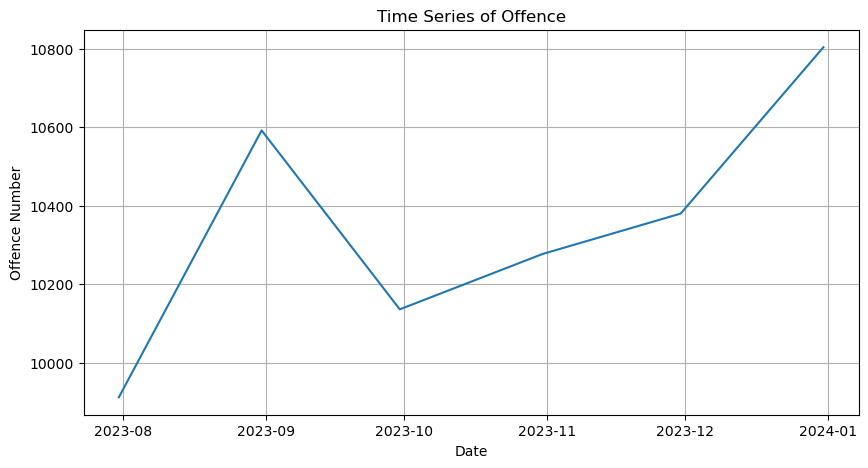

In [28]:
import matplotlib.pyplot as plt

final_df['Reported Date'] = pd.to_datetime(final_df['Reported Date'], format='%d/%m/%Y')
final_df.set_index(final_df['Reported Date'], inplace=True)
monthly_data = final_df['Offence count'].resample('M').sum() 

plt.figure(figsize=(10,5))
plt.plot(monthly_data.index, monthly_data.values, label  = 'Offence Count')

plt.title('Time Series of Offence')
plt.xlabel('Date')
plt.ylabel('Offence Number')
plt.grid(True)

plt.show()
